In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

stock_data = pd.read_csv('C:/Users/stani/Downloads/New folder (4)/AAPL.csv')
stock_data.fillna(method='ffill', inplace=True)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume']])
X = scaled_data[:-1]
y = scaled_data[1:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [6]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)


c:\Users\stani\miniconda3\envs\vismatthew\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.5722e-04
Epoch 2/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.2516e-06
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.7104e-06
Epoch 4/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2628e-06
Epoch 5/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.4884e-06
Epoch 6/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.8322e-06
Epoch 7/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1028e-06
Epoch 8/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.7751e-06
Epoch 9/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3954e-06
Epoch 10/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6391e-06
Epoch 11/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9078e-06
Epoch 12/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3205e-06
Epoch 13/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1771e-06
Epoch 14/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Absolute Percentage Error (MAPE): 2.89%


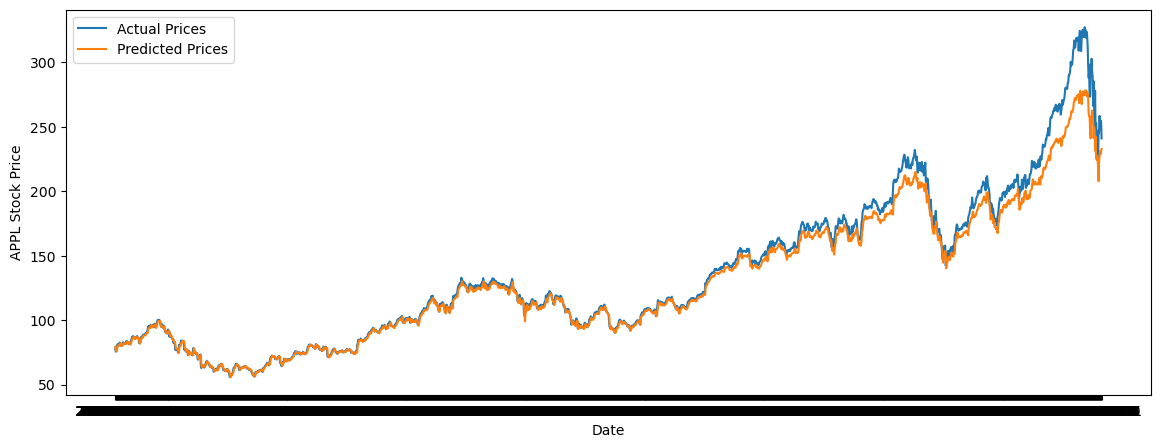

In [3]:
predictions = model.predict(X_test)
predictions_extended = np.zeros((predictions.shape[0], scaled_data.shape[1]))
predictions_extended[:, 3] = predictions[:, 0]
predictions = scaler.inverse_transform(predictions_extended)
predicted_prices = predictions[:, 3]
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(stock_data['Close'][-len(y_test):], predicted_prices)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

plt.figure(figsize=(14, 5))
plt.plot(stock_data['Date'][-len(y_test):], stock_data['Close'][-len(y_test):], label='Actual Prices')
plt.plot(stock_data['Date'][-len(y_test):], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('APPL Stock Price')
plt.legend()
plt.show()

Epoch 1/100


c:\Users\stani\miniconda3\envs\vismatthew\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


765/765 - 1s - 2ms/step - loss: 0.1051
Epoch 2/100
765/765 - 1s - 670us/step - loss: 0.0229
Epoch 3/100
765/765 - 1s - 661us/step - loss: 0.0015
Epoch 4/100
765/765 - 1s - 680us/step - loss: 5.2365e-04
Epoch 5/100
765/765 - 1s - 733us/step - loss: 5.2441e-04
Epoch 6/100
765/765 - 1s - 674us/step - loss: 5.2058e-04
Epoch 7/100
765/765 - 0s - 636us/step - loss: 5.4873e-04
Epoch 8/100
765/765 - 1s - 656us/step - loss: 5.3450e-04
Epoch 9/100
765/765 - 0s - 648us/step - loss: 5.4359e-04
Epoch 10/100
765/765 - 0s - 648us/step - loss: 5.5117e-04
Epoch 11/100
765/765 - 0s - 641us/step - loss: 5.3819e-04
Epoch 12/100
765/765 - 0s - 647us/step - loss: 5.4849e-04
Epoch 13/100
765/765 - 0s - 638us/step - loss: 5.6344e-04
Epoch 14/100
765/765 - 1s - 659us/step - loss: 5.3755e-04
Epoch 15/100
765/765 - 0s - 635us/step - loss: 5.3280e-04
Epoch 16/100
765/765 - 0s - 645us/step - loss: 5.4894e-04
Epoch 17/100
765/765 - 0s - 633us/step - loss: 5.6010e-04
Epoch 18/100
765/765 - 0s - 650us/step - loss: 5.

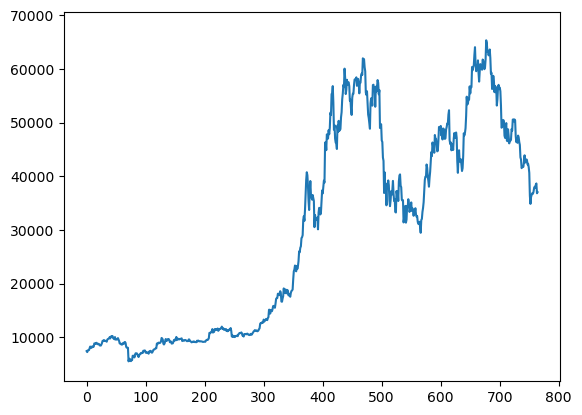

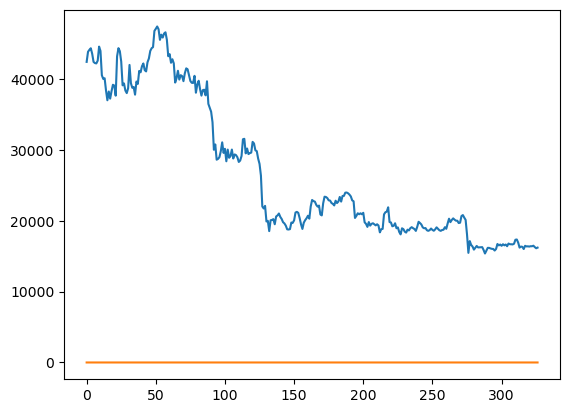

In [4]:
# Import library yang dibutuhkan

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data harga saham BBRI.JK
data = pd.read_csv(r'C:\Users\stani\Downloads\btc_usd_data.csv')

# Hapus kolom yang tidak digunakan
data.drop(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

# Konversi data ke bentuk numpy array
dataset = data.values
dataset = dataset.astype('float32')

# Scaling data menjadi rentang antara 0 dan 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Membagi data menjadi training dan testing
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Membuat fungsinya untuk membuat data dalam bentuk array 2D (sample, timestep)
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Menentukan jumlah timestep (look_back)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Membuat model LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, 1)))
model.add(Dense(1))

# Compile model menggunakan optimisasi ADAM dan fungsi kerugian Mean Squared Error
model.compile(loss='mean_squared_error', optimizer='adam')

# Reshape data menjadi bentuk 3D (sample, timestep, feature)
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

# Definisikan model menggunakan LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))

# Compile model dengan optimizer ADAM
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting model ke data training
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Melakukan prediksi pada data testing
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Reshape data hasil prediksi ke bentuk asli (sebelum discaling)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)

# Plot hasil prediksi pada data training
plt.plot(trainPredict)
plt.plot(trainY)
plt.show()

# Plot hasil prediksi pada data testing
plt.plot(testPredict)
plt.plot(testY)
plt.show()